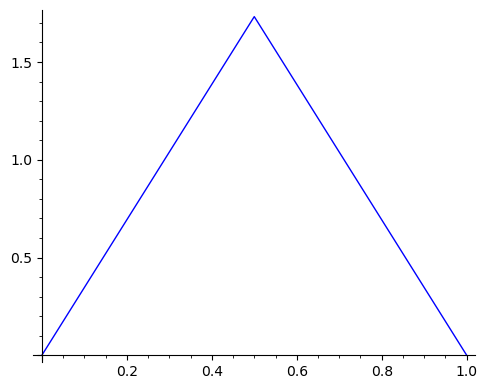

In [1]:
a = 1;
hbar = 1;
m = 1;
n = var('n');
x = var('x');
t = var('t');

En(n) = n^2*pi^2*hbar^2/(2*m*a^2);
psi(x,t,n) = sqrt(2/a)*sin(n*pi*x/a)*exp(-i*En(n)*t/hbar);
psiStar(x,t,n) = sqrt(2/a)*sin(n*pi*x/a)*exp(i*En(n)*t/hbar);

g(x) = sqrt(3/a)*(1-abs(x-a/2)/(a/2));

cn(n) = integral(g(x)*psi(x,0,n),x,0,a/2) + integral(g(x)*psi(x,0,n),x,a/2,a);

plot(g,0,a,figsize=[5,4])

In [15]:
show(cn(n))

sqrt(3)*sqrt(2)*((pi*n*cos(1/2*pi*n) + 2*sin(1/2*pi*n))/(pi^2*n^2) - 2*sin(pi*n)/(pi^2*n^2)) - sqrt(3)*sqrt(2)*(pi*n*cos(1/2*pi*n) - 2*sin(1/2*pi*n))/(pi^2*n^2)

In [16]:
show([cn(x) for x in range(1,10)])

[4*sqrt(3)*sqrt(2)/pi^2,
 0,
 -4/9*sqrt(3)*sqrt(2)/pi^2,
 0,
 4/25*sqrt(3)*sqrt(2)/pi^2,
 0,
 -4/49*sqrt(3)*sqrt(2)/pi^2,
 0,
 4/81*sqrt(3)*sqrt(2)/pi^2]

In [4]:
[cn(x).n(digits=3) for x in range(1,10)]

[0.993, 0.000, -0.110, 0.000, 0.0397, 0.000, -0.0203, 0.000, 0.0123]

In [17]:
test(x,t) = cn(1)*psi(x,t,1) + cn(3)*psi(x,t,3);
show(test(x,t))

-8/9*sqrt(3)*e^(-9/2*I*pi^2*t)*sin(3*pi*x)/pi^2 + 8*sqrt(3)*e^(-1/2*I*pi^2*t)*sin(pi*x)/pi^2

In [18]:
exptxsq(t) = integral(conjugate(test(x,t))*x^2*test(x,t),x,0,a)
show(exptxsq(t))

4/243*(8*(246*pi^2 - 365)*e^(4*I*pi^2*t) - 243*e^(8*I*pi^2*t) - 243)*e^(-4*I*pi^2*t)/pi^6

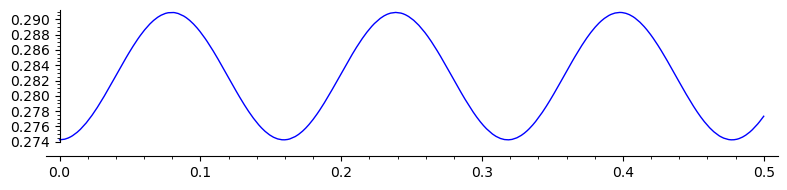

In [8]:
plot(abs(exptxsq),0,0.5,figsize=[8,2])

In [9]:
f(x) = cn(1)*psi(x,0,1) + cn(3)*psi(x,0,3) + cn(5)*psi(x,0,5) + cn(7) * psi(x,0,7)

def fn(x,t,nappr):
    return sum([cn(nn)*psi(x,t,nn) for nn in range(1,nappr)])

f(x)

-8/49*sqrt(3)*sin(7*pi*x)/pi^2 + 8/25*sqrt(3)*sin(5*pi*x)/pi^2 - 8/9*sqrt(3)*sin(3*pi*x)/pi^2 + 8*sqrt(3)*sin(pi*x)/pi^2

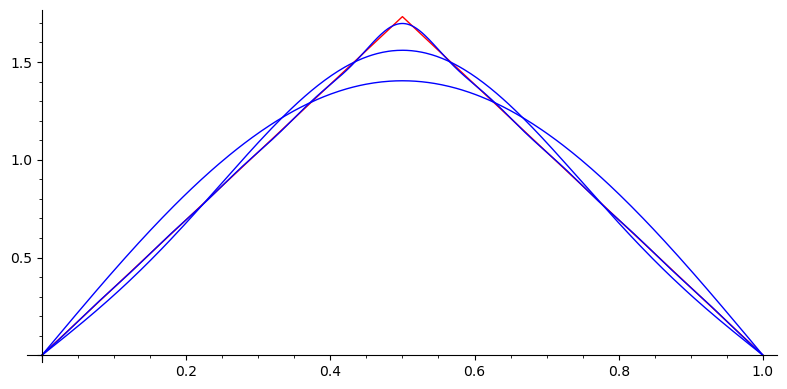

In [10]:
p1 = plot(g(x),x,0,a,figsize=[8,4],color='red');
p2 = plot(fn(x,0,2),x,0,a,figsize=[8,4],color='blue');
p3 = plot(fn(x,0,4),x,0,a,figsize=[8,4],color='blue');
p4 = plot(fn(x,0,20),x,0,a,figsize=[8,4],color='blue');
p1+p2+p3+p4

In [12]:
fn(x,t,6)

8/25*sqrt(3)*e^(-25/2*I*pi^2*t)*sin(5*pi*x)/pi^2 - 8/9*sqrt(3)*e^(-9/2*I*pi^2*t)*sin(3*pi*x)/pi^2 + 8*sqrt(3)*e^(-1/2*I*pi^2*t)*sin(pi*x)/pi^2

In [13]:
def rho(x,t):
    return (abs(fn(x,t,20))^2).n()

In [14]:
p1 = plot(lambda x:rho(x,0),0,a,figsize=[7,5],color='blue')
p2 = plot(lambda x:rho(x,0.04),0,a,figsize=[7,5],color='darkgreen')
p3 = plot(lambda x:rho(x,0.08),0,a,figsize=[7,5],color='red')
p4 = plot(lambda x:rho(x,0.12),0,a,figsize=[7,5],color='orange')
p5 = plot(lambda x:rho(x,0.16),0,a,figsize=[7,5],color='cyan')
p1+p2+p3+p4+p5

KeyboardInterrupt: 